In [7]:
import os, json
feeds = []
logfile = 'testlog.json'
# Write the dictionary object to your log file as JSON
if not os.path.isfile(logfile):
    with open(logfile, 'w') as f:
        json.dump(logdata, f)
else:
    with open(logfile) as feedsjson:
        feeds = json.load(feedsjson)
    for k,v in logdata.items():
        feeds[k] = v
    # with open(logfile, mode='w') as f:
    #     f.write(json.dumps(feeds, indent=2))

In [1]:
CURR_EMO = 'hp'
config = {
    CURR_EMO: CURR_EMO,
}

In [2]:
print(config)

{'hp': 'hp'}


In [7]:
        
# Write the dictionary object to your log file as JSON
if not os.path.isfile(logfile):
    json.dump(logdata, logfile)
else:
    with open(logfile) as feedsjson:
        feeds = json.load(feedsjson)

    feeds.append(logdata)
    with open(logfile, mode='w') as f:
        f.write(json.dumps(feeds, indent=2))

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [8]:
feeds

[]

In [9]:
import os
import json

log_file = [] 
with open('nohup.out') as f:
    log_file.append(f.readlines())

In [10]:
log_file = log_file[0]

In [11]:
result = []
for i in log_file:
    if 'LOSS train' in i or 'ACC train' in i or 'Result of EPOCH' in i:
        result.append(i.strip())

In [12]:
len(result)


513

In [13]:
result_dic = {}
for i in range(0, len(result), 3):
    epoch = result[i].split(' ')[-1]
    temp = {}
    
    # LOSS
    loss = result[i+1].split(' ')
    temp['loss'] = {'train': loss[2], 'valid': loss[4]}
    # ACC
    acc = result[i+1].split(' ')
    temp['acc'] = {'train': acc[2], 'valid': acc[4]}

    result_dic[epoch] = temp
    # result_dic[]
    # print([result[i], result[i+1], result[i+2]])

In [14]:
for k,v in logdata.items():
    feeds[k] = v

NameError: name 'logdata' is not defined

In [97]:
# logfile = '20230303_195213log.json'
# logdata = result_dic
# feeds = []
# if not os.path.isfile(logfile):
#     with open(logfile, 'w') as f:
#         json.dump(logdata, f)
# else:
#     with open(logfile) as feedsjson:
#         feeds = json.load(feedsjson)
#     for k,v in logdata.items():
#         feeds[k] = v
#     with open(logfile, mode='w') as f:
#         f.write(json.dumps(feeds, indent=2))

[0.3855, 0.1944, 0.1252, 0.1066, 0.1037, 0.1031, 0.0771, 0.0886, 0.0878, 0.0756, 0.0653, 0.0685, 0.0651, 0.0696, 0.0707, 0.0705, 0.0613, 0.0525, 0.0415, 0.0479, 0.0502, 0.0302, 0.0543, 0.0357, 0.0803, 0.0813, 0.0455, 0.0822, 0.0563, 0.065]


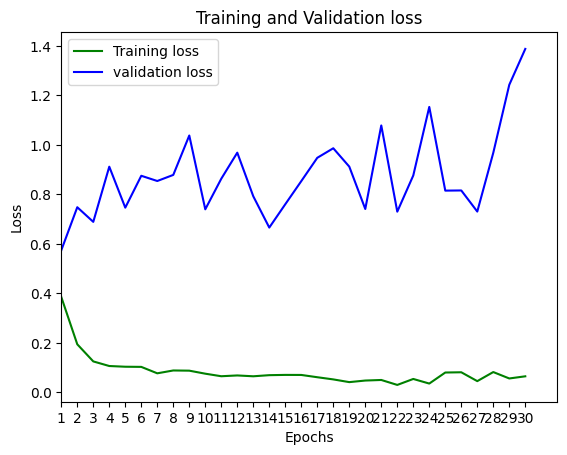

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('20230303_195213log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

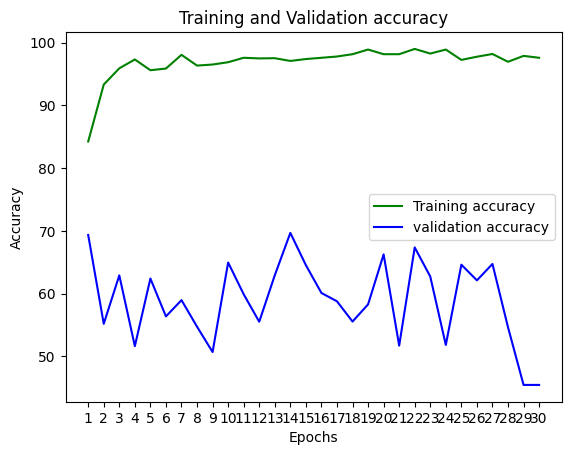

In [7]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

In [8]:
import torch
import torch.nn as nn
from resmasknet_test import *
import random
from tqdm import tqdm
def resmasking_dropout1(in_channels=3, num_classes=7, weight_path=""):
    model = ResMasking(weight_path)
    model.fc = nn.Sequential(
        nn.Dropout(0.4),
        nn.Linear(512, 1)
        # nn.Linear(512, num_classes)
    )
    def get_resource_path():
        return ''

    # use_gpu = torch.cuda.is_available()
    # if use_gpu:
    #     model.load_state_dict(
    #         torch.load(
    #             os.path.join(
    #                 get_resource_path(), "ResMaskNet_Z_resmasking_dropout1_rot30.pth"
    #                 )
    #             )['net']
    #         )
    #     model.cuda()

    # else:
    # model.load_state_dict(
    #     torch.load(
    #         os.path.join(
    #             'check_points', "model_20230303_162733_epoch24_best.pt"
    #         ),
    #     map_location={"cuda:0": "cpu"},
    #     )
    # )
    # model.fc = nn.Sequential(
    #     nn.Dropout(0.4),
    #     nn.Linear(512, 1)
    #     # nn.Linear(512, num_classes)
    # )
    return model


/opt/conda/envs/pybert/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:

model = resmasking_dropout1()



## Happy_Rank1_50_v1

[0.7056, 0.7007, 0.6875, 0.6762, 0.6622, 0.6461, 0.6203, 0.579, 0.5349, 0.4779, 0.3949, 0.3324, 0.2569, 0.1952, 0.1469]


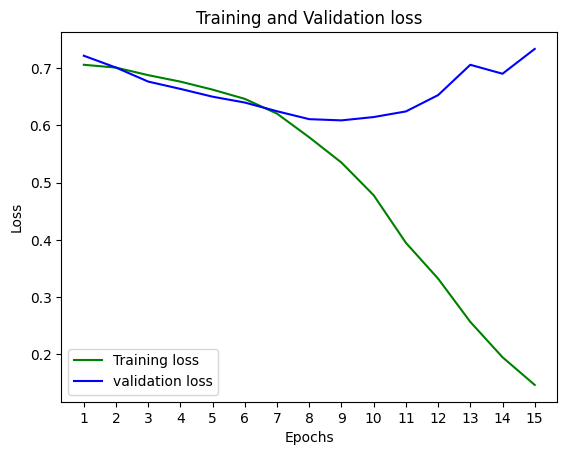

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Happy_Rank1_50_v1/20230809_170453/20230809_170453log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

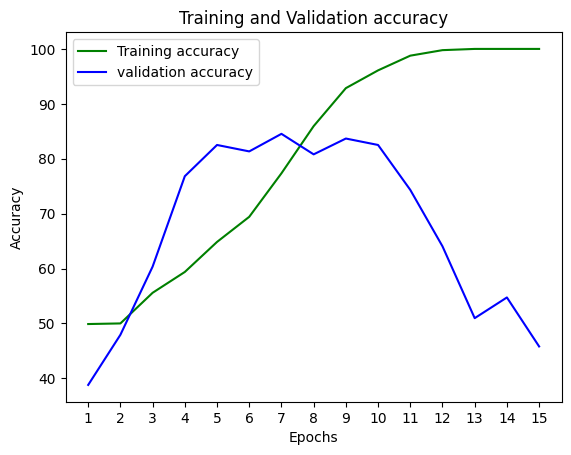

In [34]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Happy_Rank1_50_include_neg

[0.6677, 0.554, 0.3676, 0.1928, 0.0876, 0.0416, 0.0238, 0.0148, 0.0102, 0.0076, 0.0056, 0.0044, 0.0035, 0.003, 0.0025, 0.002, 0.0017, 0.0015, 0.0013, 0.0011, 0.0011, 0.0009, 0.0008, 0.0007, 0.0007]


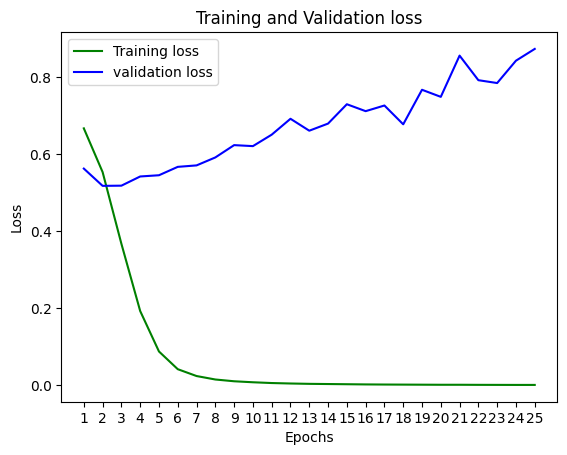

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Happy_Rank1_50_include_neg/20230809_175648/20230809_175648log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

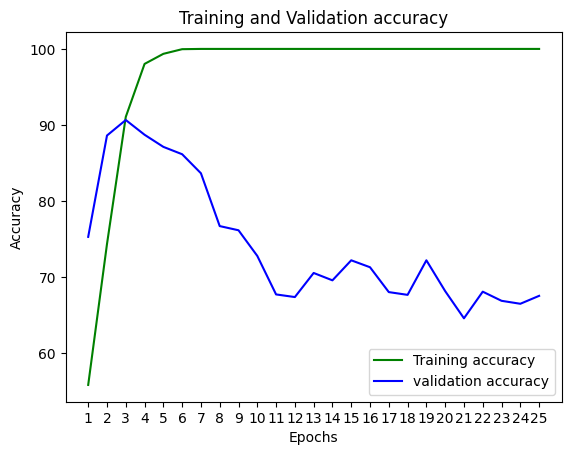

In [17]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Happy_Rank1_50_include_neg_v2

EPOCH 0
LOSS valid 0.6676110029220581
ACC valid 81.24132537841797

[0.6818, 0.6175, 0.5185, 0.3924, 0.2623, 0.1603, 0.0968, 0.0593, 0.0384, 0.0274, 0.0198, 0.0149, 0.0117, 0.0096, 0.0078, 0.0065, 0.0055, 0.0049, 0.0041, 0.0035, 0.0033, 0.0027, 0.0025, 0.0021, 0.002]


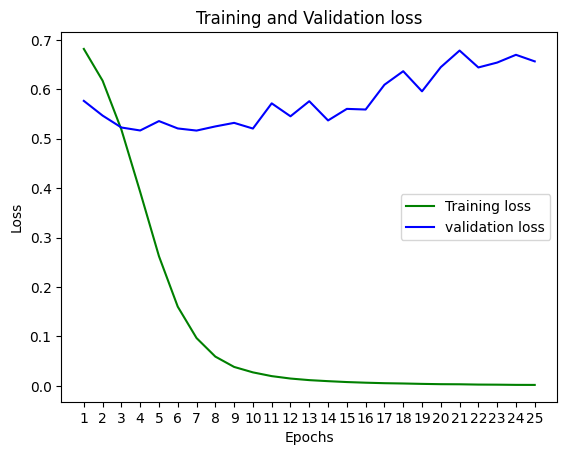

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Happy_Rank1_50_include_neg_v2/20230823_033949/20230823_033949log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

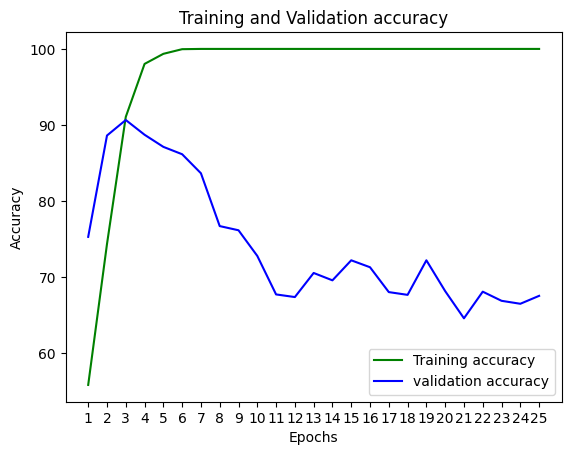

In [16]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Disgust_Rank1_50_include_neg

EPOCH 0
LOSS valid 0.6751465201377869
ACC valid 76.9357681274414

[0.6976, 0.6421, 0.5612, 0.4368, 0.3007, 0.1874, 0.1141, 0.0714, 0.0477, 0.0331, 0.0247, 0.0189, 0.0147, 0.012, 0.0096, 0.008, 0.0071, 0.0058, 0.0051, 0.0044, 0.0038, 0.0034, 0.0031, 0.0027, 0.0025]


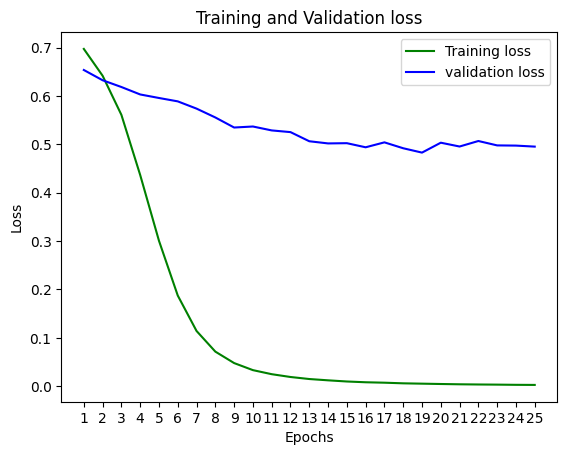

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Disgust_Rank1_50_include_neg/20230824_042023/20230824_042023log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

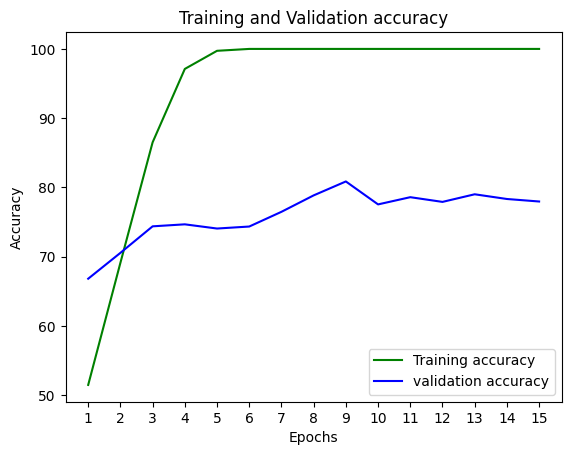

In [6]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Fear_Rank1_50_include_neg_v2

EPOCH 0
LOSS valid 0.7132651805877686
ACC valid 19.65401840209961

[0.7042, 0.6687, 0.6142, 0.5235, 0.3944, 0.258, 0.1547, 0.0937, 0.0598, 0.0413, 0.0299, 0.0222, 0.0171, 0.0135, 0.0112, 0.0093, 0.0078, 0.0066, 0.0056, 0.0049, 0.0044, 0.0037, 0.0033, 0.003, 0.0026]


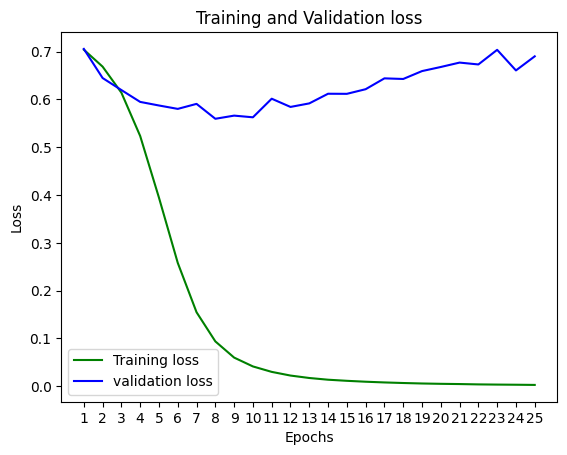

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('check_points/Fear_Rank1_50_include_neg/20230824_041944/20230824_041944log.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

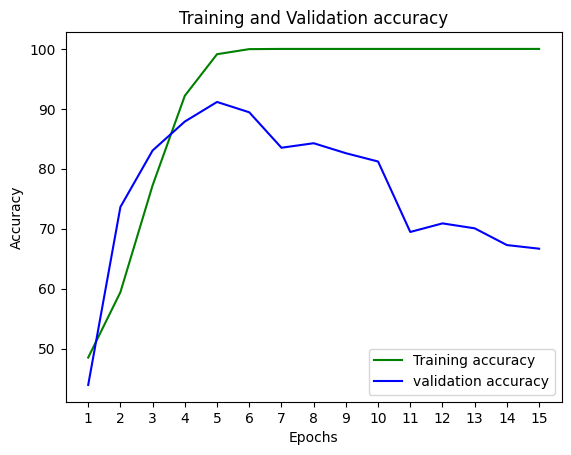

In [8]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## Sad_Rank1_50_include_neg_v2

EPOCH 0
LOSS valid 0.6821608543395996
ACC valid 62.819942474365234

[0.6909, 0.6308, 0.5353, 0.4158, 0.2782, 0.1706, 0.102, 0.0639, 0.0422, 0.0296, 0.0223, 0.017, 0.0134, 0.0107, 0.0089, 0.0075, 0.0063, 0.0054, 0.0046, 0.0041, 0.0036, 0.0032, 0.0029, 0.0025, 0.0023]


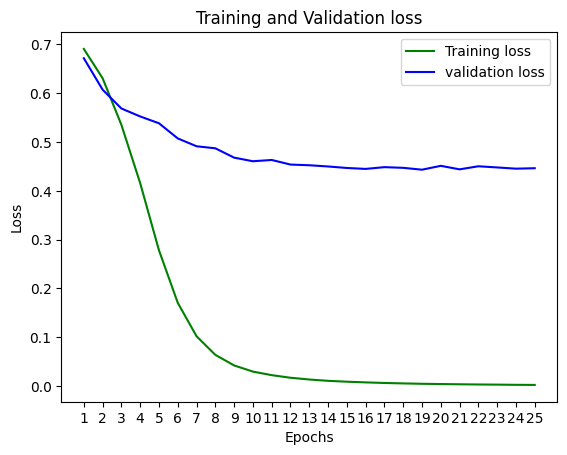

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('sadlog.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

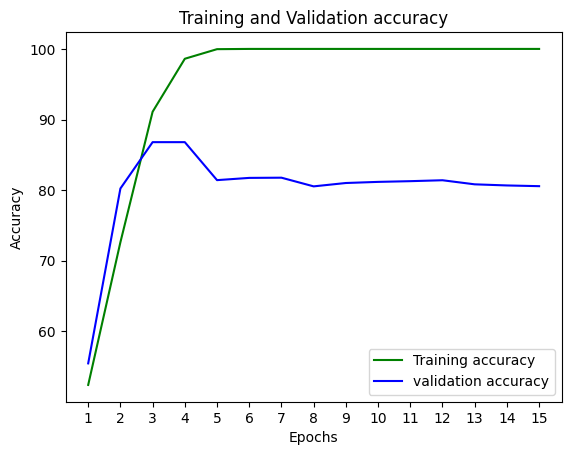

In [13]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## surprise_Rank1_50_include_neg_v2

EPOCH 0
LOSS valid 0.7036167979240417
ACC valid 37.395835876464844

[0.6838, 0.6197, 0.5219, 0.3964, 0.2634, 0.1586, 0.0949, 0.0585, 0.0379, 0.0265, 0.0197, 0.0149, 0.0118, 0.0095, 0.0078, 0.0065, 0.0055, 0.0047, 0.004, 0.0035, 0.0031, 0.0027, 0.0025, 0.0022, 0.002]


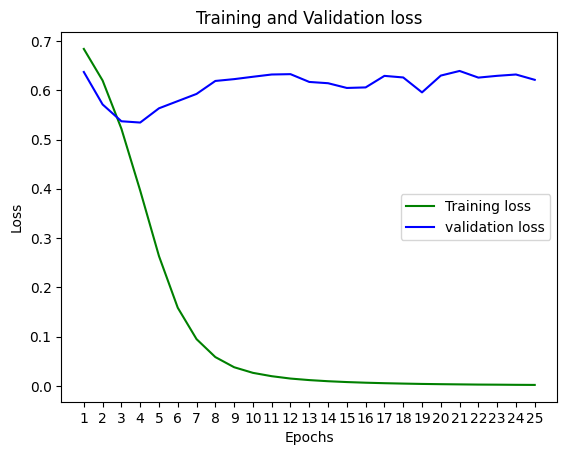

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('surpriselog.json'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

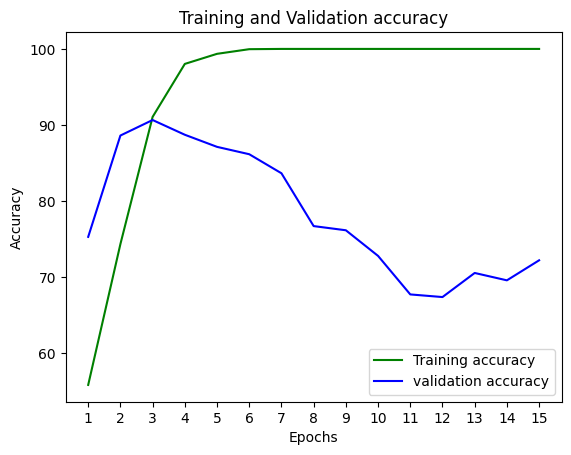

In [15]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

## angry_Rank1_50_include_neg

EPOCH 0
LOSS valid 0.6957982778549194
ACC valid 46.8365592956543

[0.6969, 0.6373, 0.5536, 0.4371, 0.3021, 0.1873, 0.1122, 0.07, 0.0454, 0.0316, 0.0232, 0.0181, 0.0142, 0.0114, 0.0093, 0.0078, 0.0065, 0.0057, 0.0048, 0.0042, 0.0039, 0.0034, 0.003, 0.0026, 0.0023]


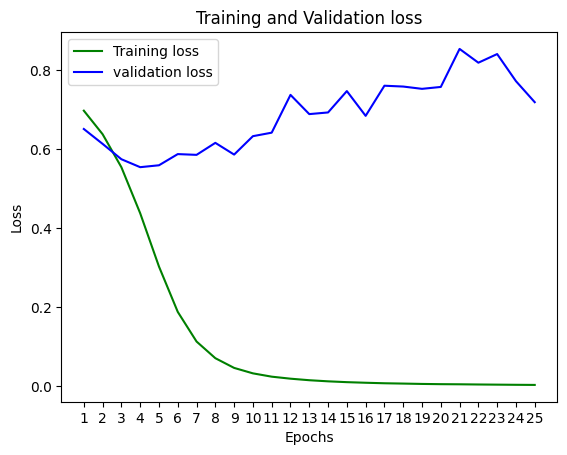

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import json
result_dic = []
result_dic = json.load(open('angry_50_50.log'))
# result_dic = json.load(open('20230413_063159log.json'))
# print(result_dic)

# draw fig
loss_train = []
loss_val = []
epochs = []
for k,v in result_dic.items():
    # if int(k) > 15:
    #     break
    epochs.append(k)
    # print(v)
    loss_train.append(round(float(v['train_loss']), 4))
    loss_val.append(round(float(v['val_loss']), 4))
    # loss_train.append(round(float(v['loss']['train']), 4))
    # loss_val.append(round(float(v['loss']['valid']), 4))

print(loss_train)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.xlim([0,31])
plt.legend()
# plt.savefig('train_valid_loss.png', bbox_inches='tight', dpi=300)

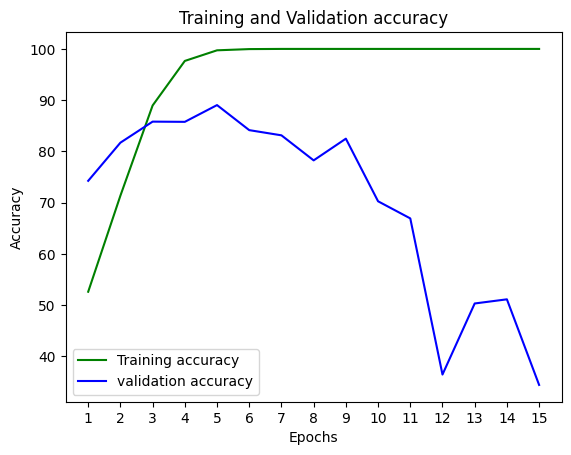

In [20]:
acc_train = []
acc_val = []
epochs = []


for k,v in result_dic.items():
    if int(k) > 15:
        break
    epochs.append(k)
    # print(v['loss'])
    acc_train.append(round(float(v['train_acc']), 4))
    acc_val.append(round(float(v['val_acc']), 4))


plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
# plt.savefig('train_valid_acc.png', bbox_inches='tight', dpi=300)

# Regression plot

## Angry

In [2]:
import copy
subject_data = copy.deepcopy(raw_data[exp])

NameError: name 'raw_data' is not defined

In [ ]:
# Regression plot
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import copy
# print(total_data.head())

# myexp = 'angry'
# total data is raw_data 
# total pyfeat data is feat_order

values = []

def get_average_rank(result ,exp_name_rank_order_pyfeat):
    # print('result', result)
    # print(exp_name_rank_order_pyfeat)
    aver_ranking = list(exp_name_rank_order_pyfeat.items())
    for i, c in enumerate(aver_ranking):
        aver_ranking[i] = [c[0], 0]
    # print(aver_ranking)
    for i in range(len(result)):
        # print(result)

        temp_data = list(enumerate(list(result.items())[i][1]))
        # print(f'temp_data{temp_data}')
        temp_list = []
        for i, c in enumerate(temp_data):
            temp_list.append((c, exp_name_rank_order_pyfeat[c[1]]))
        temp_list.sort(key=lambda x:x[1])
        # print(temp_list)
        for i, c in enumerate(aver_ranking):
            if c[0] == temp_list[i][0][1]:
                aver_ranking[i][1] += temp_list[i][0][0]
    aver_ranking_new = list(enumerate(aver_ranking))
    aver_ranking_new.sort(key=lambda x:x[1][1], reverse=False)

    output_list = [kk[1][0] for kk in aver_ranking_new]
    return output_list, aver_ranking_new



    
for exp, v in raw_data.items():
    # FOR DEBUG ------
    # myexp = 'angry'
    # if exp == myexp:
    # FOR DEBUG END ------
    myexp = exp
    sns.set(font_scale = 1.8)

    f, ax = plt.subplots(figsize=(12, 12), dpi=300)
    f.set_facecolor('white') # set background color
    ax.set_title('{}: Correlation between Subject rank order and ResMaskNet score order'.format(myexp.title())) # title
    ax.set_xlabel('ResMaskNet {} score order'.format(myexp)) # x-axis
    ax.set_ylabel('Subject {} ranking order'.format(myexp)) # y-axis

    subject_data = copy.deepcopy(raw_data[exp])
    tmp_feat_data = feat_order[exp]
    tmp_feat_data = {v:idx for idx,v in enumerate(tmp_feat_data)}

    average_rank, _ = get_average_rank(subject_data, tmp_feat_data)
    subject_data[7] = average_rank
    print(f'{myexp}average_rank', average_rank[:21])

    for i in range(len(subject_data)):
        subj_id = i + 1
        temp_data = list(enumerate(subject_data[subj_id]))

        # sort the data to feat order, which means x axis is feat order
        # temp_list = (14, 'an_433.png'), 0), the first is the subject rank, the second is the image name, the third is the Py-Feat rank 
        temp_list = []
        for j, c in enumerate(temp_data):
            temp_list.append((c, tmp_feat_data[c[1]]))
        temp_list.sort(key=lambda x:x[1])

        x = [k[1] for k in temp_list]
        y = [m[0][0] for m in temp_list]

        X, y = np.array(x), np.array(y)
        # print(X, y)
        X = X[:, None] # Reshape to 2D as requested
        reg = LinearRegression()
        reg.fit(X, y)

        # Predict response
        predictions = reg.predict(X)

        # Use stats linregress library
        reg2 = stats.linregress(x, y)

        # subject_name
        s_name = 'subject' + str(subj_id)
        if subj_id == 7:
            s_name = 'average'
        # r is The Pearson correlation coefficient

        # sns.regplot(x=x, y=y, ci=None, label=s_name + ' r = {:.4}, p-value = {:.4}'.format(reg2.rvalue, reg2.pvalue)) # type: ignore
        sns.regplot(x=x, y=y, ci=None, label=s_name) # type: ignore
        plt.legend(loc='upper left', fontsize=16)

    # save fig when needed
    # plt.savefig('{}_linear_regression_fitting.png'.format(myexp), bbox_inches='tight', dpi=300)

    plt.savefig(os.path.join(analysis_path, f'{myexp}_linear_regression_fitting_simple_ver.png'), bbox_inches='tight', dpi=300)



## Disgust

## Fear

## Happy

## Sad

## Surprise